In [14]:
# https://github.com/onnx/tutorials/blob/master/tutorials/OnnxMxnetImport.ipynb
# You can get onnx file and input image from link below:
# $ wget https://s3.amazonaws.com/onnx-mxnet/examples/super_resolution.onnx
# $ wget https://s3.amazonaws.com/onnx-mxnet/examples/super-res-input.jpg

In [4]:
import onnx_mxnet
from IPython.core.display import display
sym, params = onnx_mxnet.import_model('super_resolution.onnx')

/Users/kawasakitoshiya/.pyenv/versions/anaconda-4.0.0/lib/python2.7/site-packages/onnx_mxnet/common.py:97: UserWarning: Attribute axis is disabled in sym.broadcast_add
  warnings.warn("Attribute {} is disabled in sym.{}".format(k, op_name))


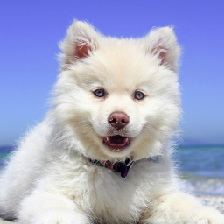

In [8]:
import numpy as np
import mxnet as mx
from PIL import Image
img = Image.open('super_res_input.jpg').resize((224, 224))
display(img) # show the image
img_ycbcr = img.convert("YCbCr")
img_y, img_cb, img_cr = img_ycbcr.split()
x = mx.nd.array(np.array(img_y)[np.newaxis, np.newaxis, :, :])

In [9]:
mod = mx.mod.Module(symbol=sym, data_names=['input_0'], label_names=None)
mod.bind(for_training=False, data_shapes=[('input_0',x.shape)])
mod.set_params(arg_params=params, aux_params=None)

In [10]:

from collections import namedtuple
Batch = namedtuple('Batch', ['data'])
mod.forward(Batch([x]))
output = mod.get_outputs()[0][0][0]

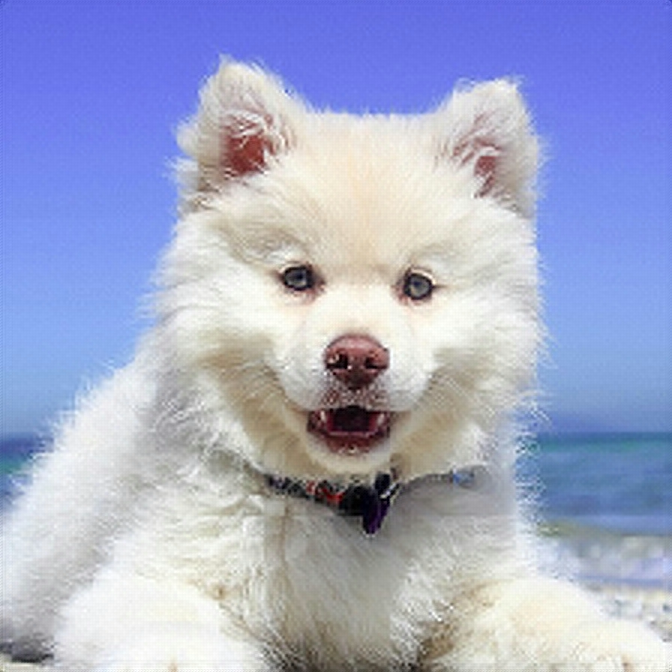

In [11]:
img_out_y = Image.fromarray(np.uint8((output.asnumpy().clip(0, 255)), mode='L'))
result_img = Image.merge("YCbCr", [
        	img_out_y,
        	img_cb.resize(img_out_y.size, Image.BICUBIC),
        	img_cr.resize(img_out_y.size, Image.BICUBIC)
]).convert("RGB")
display(result_img)
result_img.save("super_res_output.jpg")